# Preprocessing
Dummie variables already created

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('dog_adoption2')
df.shape

(23298, 58)

Dropping Transfered dogs to capture how long it take for a dog to get adopted. Transfers are likely based on how busy the shelter is and not dependent on a dog's characteristics. 

In [3]:
df = df[df['outcome_type']=='Adoption']
df.head()

,Unnamed: 0,outcome_type,age_upon_outcome_(years),outcome_datetime,outcome_monthyear,animal_type,intake_condition,intake_type,sex_upon_outcome,age_upon_intake_(years),...,color_Brown,color_Brown Brindle,color_Buff,color_Gray,color_Red,color_Sable,color_Tan,color_Tricolor,color_White,color_Yellow
1,12,Adoption,16,2013-11-22 09:44:00,2013-11,Dog,Normal,Owner Surrender,Neutered Male,16,...,0,0,0,0,0,0,0,0,0,0
2,14,Adoption,17,2016-10-07 12:34:00,2016-10,Dog,Aged,Public Assist,Neutered Male,17,...,0,0,0,0,0,0,1,0,0,0
3,22,Adoption,15,2015-10-29 15:00:00,2015-10,Dog,Normal,Stray,Neutered Male,15,...,0,0,0,0,0,1,0,0,0,0
6,32,Adoption,15,2016-11-15 10:37:00,2016-11,Dog,Normal,Stray,Spayed Female,15,...,0,0,0,0,0,0,0,0,0,0
7,48,Adoption,11,2013-11-16 12:24:00,2013-11,Dog,Normal,Stray,Spayed Female,11,...,0,0,0,0,0,0,0,1,0,0


In [4]:
#creating dummy variables for the remaining categorical variables
df = pd.get_dummies(df, columns=['intake_condition', 'intake_type', 'sex_upon_outcome'], prefix=['intake_cond', 'intake_type', 'sex'])


In [5]:
#changing time_in_shelter_days to int
df['time_in_shelter_days'] = df['time_in_shelter_days'].astype(int)

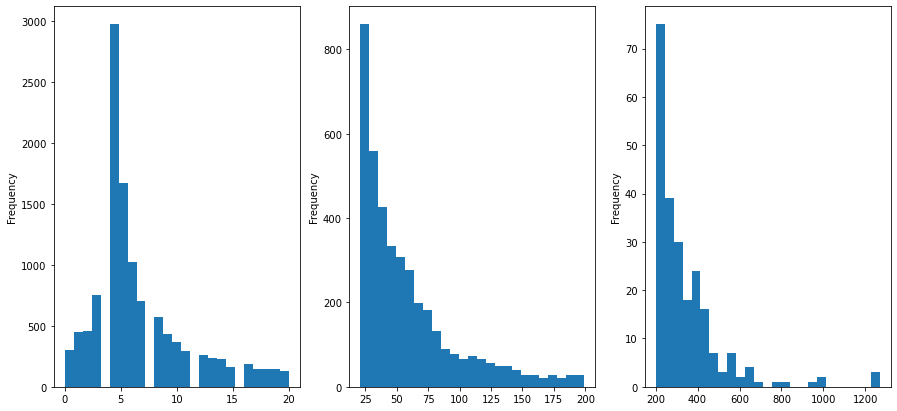

In [6]:
# histograms of time in shleter
time_most = df[df.loc[:,'time_in_shelter_days'] >=200 ]
time20 = df[df.loc[:,'time_in_shelter_days']<= 20 ]
time_mid = df[(df.loc[:, 'time_in_shelter_days']> 20) & (df.loc[:, 'time_in_shelter_days']<200)]


fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (15,7))
time20['time_in_shelter_days'].plot(ax=axes[0], kind='hist', bins=25)
time_mid['time_in_shelter_days'].plot(ax=axes[1], kind='hist', bins=25)
time_most['time_in_shelter_days'].plot(ax=axes[2], kind='hist', bins=25)


In [7]:
#most dogs spend less than a week in the shelter
print('Percentiles of time in shelter. \n 10th:{}, 50th: {}, 90th: {}'.format(df['time_in_shelter_days'].quantile(q=.10),
        df['time_in_shelter_days'].quantile(q=.50), df['time_in_shelter_days'].quantile(q=.90)))

Percentiles of time in shelter. 
 10th:3.0, 50th: 7.0, 90th: 61.0


In [8]:
#creating bins based on quantiles
labels = ['< 4 days', '4-5 days', '5-10 days', '10-31 days', '31-1268 days']
df['time_in_shelter_binned'] = pd.qcut(df['time_in_shelter_days'], 5, labels=labels)

In [9]:
df['time_in_shelter_binned'].value_counts().sort_values()

4-5 days        1666
10-31 days      3048
5-10 days       3098
31-1268 days    3154
< 4 days        4924
Name: time_in_shelter_binned, dtype: int64

In [10]:
#convert binned time in shelter to int (0-4) for modeling purposes
def create_dict(items): #creates dict {bin:num}
        return {v: i for i, v in enumerate(items, 0)}
time_binned_int = df['time_in_shelter_binned'].unique().tolist()
time = create_dict(time_binned_int)
df['time_binned_int']=df['time_in_shelter_binned'].map(create_dict(time))
df.head()

,Unnamed: 0,outcome_type,age_upon_outcome_(years),outcome_datetime,outcome_monthyear,animal_type,age_upon_intake_(years),intake_datetime,intake_monthyear,time_in_shelter_days,...,intake_type_Euthanasia Request,intake_type_Owner Surrender,intake_type_Public Assist,intake_type_Stray,sex_Intact Female,sex_Intact Male,sex_Neutered Male,sex_Spayed Female,time_in_shelter_binned,time_binned_int
1,12,Adoption,16,2013-11-22 09:44:00,2013-11,Dog,16,2013-10-03 15:47:00,2013-10,49,...,0,1,0,0,0,0,1,0,31-1268 days,0
2,14,Adoption,17,2016-10-07 12:34:00,2016-10,Dog,17,2016-09-28 12:05:00,2016-09,9,...,0,0,1,0,0,0,1,0,5-10 days,1
3,22,Adoption,15,2015-10-29 15:00:00,2015-10,Dog,15,2015-10-06 12:29:00,2015-10,23,...,0,0,0,1,0,0,1,0,10-31 days,2
6,32,Adoption,15,2016-11-15 10:37:00,2016-11,Dog,15,2016-08-17 14:05:00,2016-08,89,...,0,0,0,1,0,0,0,1,31-1268 days,0
7,48,Adoption,11,2013-11-16 12:24:00,2013-11,Dog,11,2013-11-13 18:16:00,2013-11,2,...,0,0,0,1,0,0,0,1,< 4 days,3


In [20]:
#columns to be used as x df, y will only be time_in_shelter_binned
l = list(df.columns)
#c = [a for a in l if a startswith(['breed', 'color'])]
c = df.columns[df.columns.str.startswith(('breed', 'color', 'sex', 'intake_type_', 'intake_cond_'))].to_list()
columns=['age_upon_outcome_(years)']+ c 
columns
x_df = df[columns]

In [21]:
x_df.columns

Index(['age_upon_outcome_(years)', 'intake_cond_int', 'intake_type_int',
       'sex_upon_outcome_int', 'breed_Anatol Shepherd',
       'breed_Australian Cattle Dog', 'breed_Australian Kelpie',
       'breed_Australian Shepherd', 'breed_Beagle', 'breed_Border Collie',
       'breed_Boxer', 'breed_Cairn Terrier', 'breed_Catahoula',
       'breed_Chihuahua Longhair', 'breed_Chihuahua Shorthair',
       'breed_Dachshund', 'breed_German Shepherd', 'breed_Great Pyrenees',
       'breed_Jack Russell Terrier', 'breed_Labrador Retriever',
       'breed_Miniature Poodle', 'breed_Miniature Schnauzer', 'breed_Pit Bull',
       'breed_Plott Hound', 'breed_Pointer', 'breed_Rat Terrier',
       'breed_Rottweiler', 'breed_Shih Tzu', 'breed_Siberian Husky',
       'breed_Staffordshire', 'breed_Yorkshire Terrier', 'color_Black',
       'color_Blue', 'color_Brown', 'color_Brown Brindle', 'color_Buff',
       'color_Gray', 'color_Red', 'color_Sable', 'color_Tan', 'color_Tricolor',
       'color_White', '

In [25]:
x = x_df
y = df[['time_in_shelter_binned']]
x.head()

,age_upon_outcome_(years),intake_cond_int,intake_type_int,sex_upon_outcome_int,breed_Anatol Shepherd,breed_Australian Cattle Dog,breed_Australian Kelpie,breed_Australian Shepherd,breed_Beagle,breed_Border Collie,...,intake_cond_Pregnant,intake_cond_Sick,intake_type_Euthanasia Request,intake_type_Owner Surrender,intake_type_Public Assist,intake_type_Stray,sex_Intact Female,sex_Intact Male,sex_Neutered Male,sex_Spayed Female
1,16,0,2,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,17,2,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
6,15,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
7,11,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


Split into train and test data

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =.3, random_state=42)

# Modeling
 KNN, Random Forest, and Logistic Regression 

In [38]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

train_scores = []
test_scores = []

for i in range(1, 10):
    knn = KNeighborsClassifier(i)
    knn.fit(x_train, y_train)
    
    train_scores.append(knn.score(x_train, y_train))
    test_scores.append(knn.score(x_test, y_test))

In [39]:
print('train:',[round(x, 4) for x in train_scores])
print('test:',[round(x, 4) for x in test_scores])
#knn not looking too promising... curse of dimensionality?

train: [0.5374, 0.4499, 0.4688, 0.4785, 0.4725, 0.473, 0.4677, 0.4657, 0.4676]
test: [0.3205, 0.2759, 0.317, 0.3338, 0.3407, 0.3392, 0.3449, 0.3497, 0.3568]


In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
